# Integrated Simulations

In [1]:
import os; from os import listdir; from os.path import isfile, join
import re  
from skimage import io 
from skimage.io import imread
cwd = os.getcwd(); os.chdir('../../rsnaped');import rsnaped as rsp; os.chdir(cwd)
from tqdm.notebook import tqdm
# To manipulate arrays
import numpy as np 
import random
import re
from tqdm.notebook import tqdm
from timeit import default_timer as timer
import scipy
import pandas as pd
import shutil
# Plotting
import matplotlib as mpl ; import matplotlib.pyplot as plt 
# To create interactive elements
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image

## Simulated Cell customization

In [2]:
# These are the parameters that need to be tested. 
number_of_simulated_cells = 8*2 # PLEASE TEST MIN 1 MAX 10
number_spots_per_cell = 50     # PLEASE TEST MIN 5 MAX 200
simulation_time_in_sec = 10     # PLEASE TEST MIN 10 MAX 100
diffusion_coefficient = 0      # PLEASE TEST MIN 0.1 MAX 2

In [3]:
intensity_calculation_method = 'disk_donut'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'max_area' # options are : 'max_spots' and 'max_area' 
use_optimization_for_tracking = 0 # 0 not using, 1 is using optimization

In [4]:
particle_size = 5 # spot size for the simulation and tracking.
elongation_rate = 3
initiation_rate = 0.03
frame_selection_empty_video = 'loop' # Options are: 'constant' , 'shuffle' and 'loop'

## Running the simulations

In [5]:
def fun_simulated_cells(number_of_simulated_cells=3,number_spots_per_cell=80,simulation_time_in_sec =100,step_size_in_sec=1,particle_size=5, diffusion_coefficient =1,path_to_rSNAPsim= None, path_to_save_output='./temp',intensity_calculation_method='gaussian_fit',frame_selection_empty_video=frame_selection_empty_video):
    spot_size = particle_size
    spot_sigma = 2
    # Code that creates the folder to store results.
    diffusion_coefficient_string = str(diffusion_coefficient).replace('.','_')
    directory_name = '/Simulation_V2__'+'ns_'+str(number_spots_per_cell) +'_diff_'+ diffusion_coefficient_string 
    path_to_save_output = './temp'
    save_to_path =  path_to_save_output + directory_name 
    if not os.path.exists(save_to_path):
        os.makedirs(save_to_path)
    else:
        shutil.rmtree(save_to_path)
        os.makedirs(save_to_path)
    # Loading trajectories from file
    ssa_trajectories = np.load('../../DataBases/rsnapsim_simulations/bactin_ssa.npy')
    counter = 0
    ## Main loop that creates each cell and dataframe
    for cell_number in range (0, number_of_simulated_cells):
        ouput_directory_name = '../../DataBases/videos_for_sim_cell'
        list_files_names = sorted([f for f in listdir(ouput_directory_name) if isfile(join(ouput_directory_name, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
        list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
        path_files = [ ouput_directory_name+'/'+f for f in list_files_names ] # creating the complete path for each file
        video_path = path_files[counter]
        video = io.imread(video_path) 
        counter +=1
        if counter>=len(path_files):
            counter =0
        random_index_ch1 = np.random.randint(low=0, high=ssa_trajectories.shape[0]-1, size=(number_spots_per_cell,))
        random_index_ch2 = np.random.randint(low=0, high=ssa_trajectories.shape[0]-1, size=(number_spots_per_cell,))
        simulated_trajectories_ch1 = ssa_trajectories[random_index_ch1,0:simulation_time_in_sec:step_size_in_sec]
        simulated_trajectories_ch2 =  ssa_trajectories[random_index_ch2,0:simulation_time_in_sec:step_size_in_sec]
        # Simulations for intensity
#        ssa1 = rss.ssa_solver(n_traj = number_spots, start_time=starting_time,tf=starting_time+n_frames, tstep=starting_time+n_frames,k_elong_mean=3, k_initiation=.03)  # tstep = total number of steps including the burnin time 
#        simulated_trajectories = ssa1.intensity_vec
#        ssa2 = rss.ssa_solver(n_traj = number_spots, start_time=starting_time,tf=starting_time+n_frames, tstep=starting_time+n_frames,k_elong_mean=3, k_initiation=.03)  # tstep = total number of steps including the burnin time 
#        simulated_trajectories_blue = ssa2.intensity_vec
        # simulated trajectories for the green and blue channels
#        simulated_trajectories_ch2 = simulated_trajectories
#        simulated_trajectories_ch3 = simulated_trajectories_blue
        # Running the cell simulation
        saved_file_name = save_to_path+'/sim_cell_'+str(cell_number)
        tensor_video , tensor_for_image_j , spot_positions_movement, DataFrame_particles_intensities = rsp.SimulatedCell( base_video=video, number_spots = number_spots_per_cell, number_frames=simulation_time_in_sec, step_size=step_size_in_sec, diffusion_coefficient =diffusion_coefficient, simulated_trajectories_ch0=None, size_spot_ch0=spot_size, spot_sigma_ch0=spot_sigma, simulated_trajectories_ch1=simulated_trajectories_ch1, size_spot_ch1=spot_size, spot_sigma_ch1=spot_sigma, simulated_trajectories_ch2=simulated_trajectories_ch2, size_spot_ch2=spot_size, spot_sigma_ch2=spot_sigma, ignore_ch0=0,ignore_ch1=0, ignore_ch2=1,save_as_tif_uint8=0,save_as_tif =1,save_as_gif=0, save_dataframe=1, saved_file_name=saved_file_name,create_temp_folder = False, intensity_calculation_method=intensity_calculation_method,perform_video_augmentation=1,frame_selection_empty_video=frame_selection_empty_video).make_simulation()      
        #print ('The results are saved in folder: ', saved_file_name)
    return save_to_path


In [6]:
# running the simulation
start = timer()
ouput_directory_name = fun_simulated_cells(number_of_simulated_cells=number_of_simulated_cells,number_spots_per_cell=number_spots_per_cell,simulation_time_in_sec =simulation_time_in_sec,step_size_in_sec=1,particle_size=particle_size, diffusion_coefficient=diffusion_coefficient,path_to_rSNAPsim= None,intensity_calculation_method=intensity_calculation_method,frame_selection_empty_video=frame_selection_empty_video)
end = timer()
print('Time to generte simulated data:',round((end - start)/60), ' min')

Time to generte simulated data: 2  min


In [7]:
path = ouput_directory_name

In [8]:
# Reads the folder with the results and import the simulations as lists
list_files_names = sorted([f for f in listdir(ouput_directory_name) if isfile(join(ouput_directory_name, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ ouput_directory_name+'/'+f for f in list_files_names ] # creating the complete path for each file
# Reading the microscopy data
list_videos = [imread(f)[:,:,:,:] for f in  path_files] # List with all the videos
nimg = number_of_simulated_cells

In [9]:
# Reads the dataframes
list_files_dfnames = sorted([f for f in listdir(ouput_directory_name) if isfile(join(ouput_directory_name, f)) and ('.csv') in f], key=str.lower)  # reading all tif files in the folder
list_files_dfnames.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files_df = [ ouput_directory_name+'/'+f for f in list_files_dfnames ] # creating the complete path for each file
list_df_real_positions = [pd.read_csv(f) for f in  path_files_df] # List with all the videos

## Display results as images

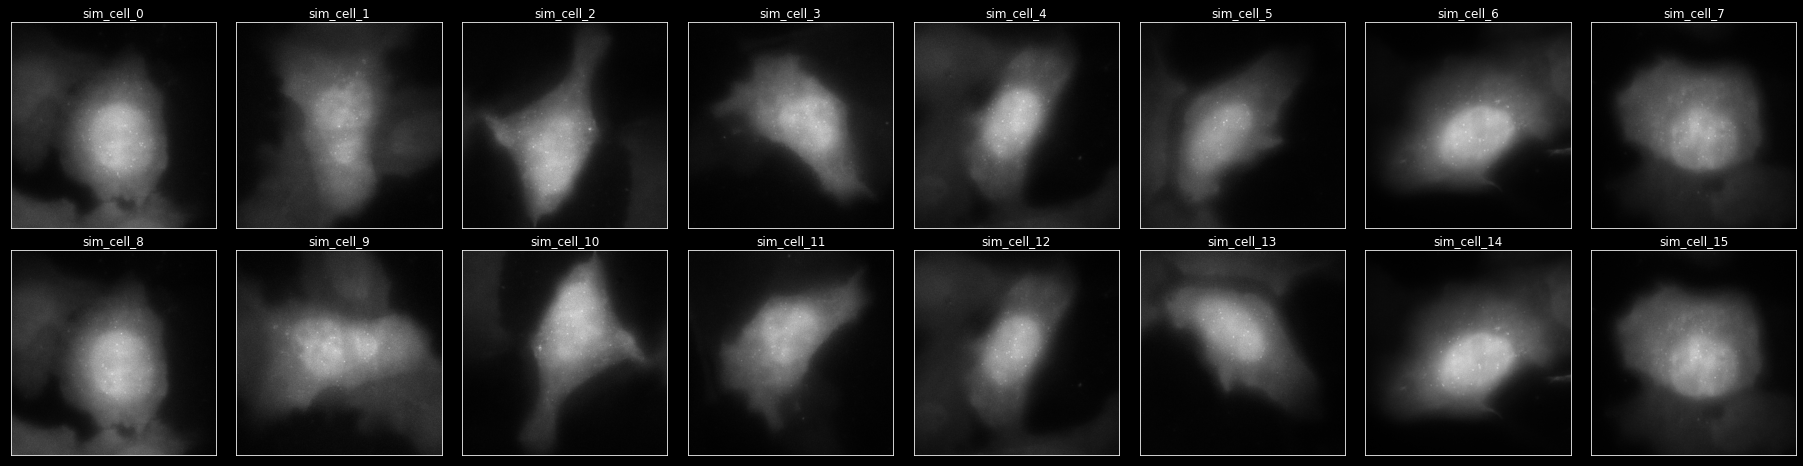

In [10]:
# Showing the simulated images
rsp.VisualizerImage(list_videos,list_files_names=list_files_names,selected_channel =1,selected_timepoint= 0,normalize=0,individual_figure_size=4).plot()

In [11]:
#rsp.VisualizerImage(list_videos,list_selected_particles_dataframe = list_df_real_positions,list_files_names=list_files_names,selected_channel =0,selected_timepoint= 1,normalize=0,individual_figure_size=4).plot()